Hello! Please provide your user name so the necessary files on this computer can be accessed.


 rveenstra


Nitrate Calibration Curve


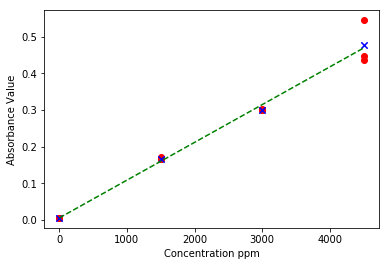

absorbance = 0.000103(concentration) + 0.005967
concentration = (absorbance - 0.005967) / 0.000103
Nitrate Calibration Curve


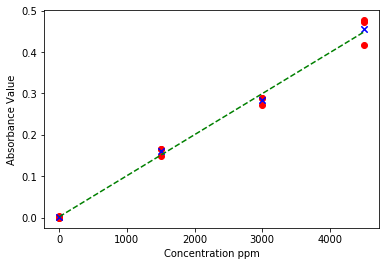

absorbance = 0.000099(concentration) + 0.001933
concentration = (absorbance - 0.001933) / 0.000099
Nitrate Calibration Curve


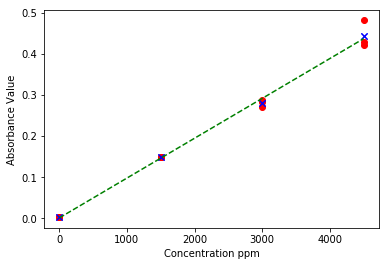

absorbance = 0.000097(concentration) + 0.000800
concentration = (absorbance - 0.000800) / 0.000097
Nitrate Calibration Curve


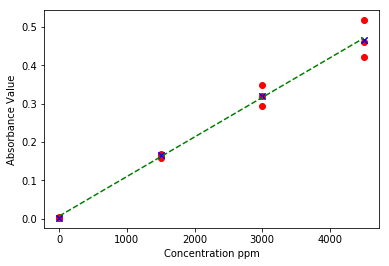

absorbance = 0.000103(concentration) + 0.006933
concentration = (absorbance - 0.006933) / 0.000103
Nitrate Calibration Curve


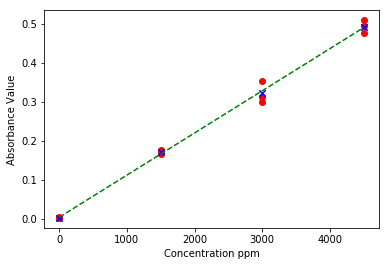

absorbance = 0.000108(concentration) + 0.003767
concentration = (absorbance - 0.003767) / 0.000108
Nitrate Calibration Curve


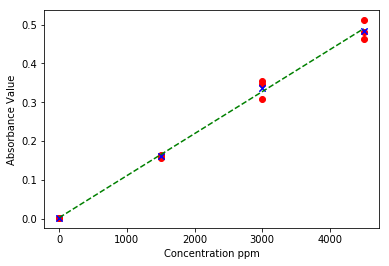

absorbance = 0.000108(concentration) + 0.002833
concentration = (absorbance - 0.002833) / 0.000108
Nitrate Calibration Curve


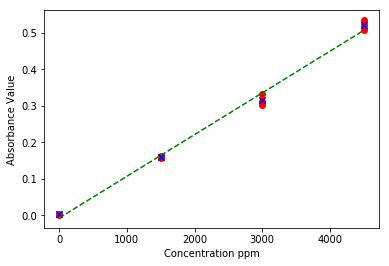

absorbance = 0.000114(concentration) + -0.007500
concentration = (absorbance - -0.007500) / 0.000114
Nitrate Calibration Curve


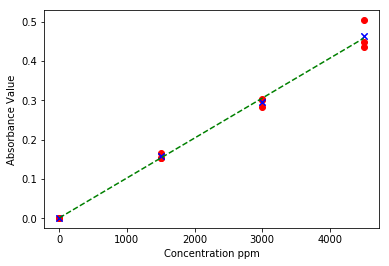

absorbance = 0.000102(concentration) + 0.001033
concentration = (absorbance - 0.001033) / 0.000102
Nitrate Calibration Curve


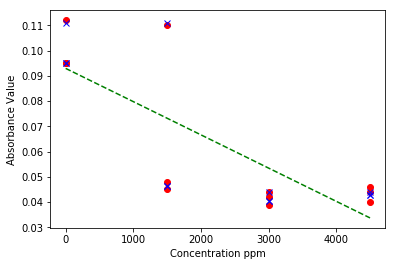

absorbance = -0.000013(concentration) + 0.092933
concentration = (absorbance - 0.092933) / -0.000013
Nitrate Calibration Curve


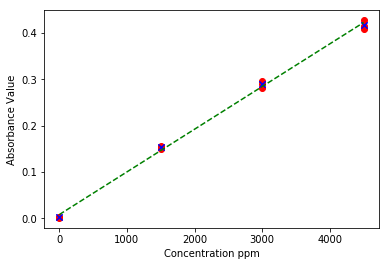

absorbance = 0.000092(concentration) + 0.008167
concentration = (absorbance - 0.008167) / 0.000092
Nitrate Calibration Curve


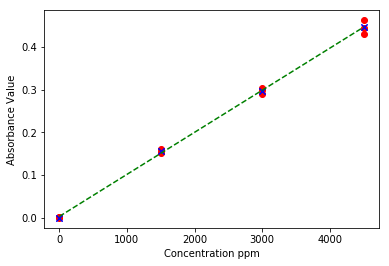

absorbance = 0.000098(concentration) + 0.003367
concentration = (absorbance - 0.003367) / 0.000098
Nitrate Calibration Curve


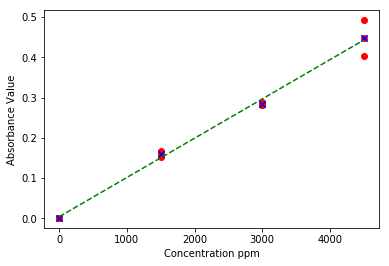

absorbance = 0.000097(concentration) + 0.004033
concentration = (absorbance - 0.004033) / 0.000097
Nitrate Calibration Curve


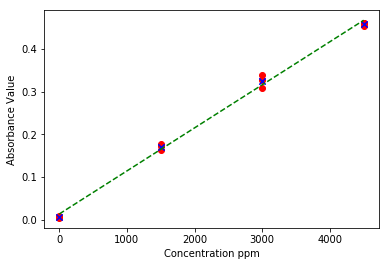

absorbance = 0.000101(concentration) + 0.013233
concentration = (absorbance - 0.013233) / 0.000101
Nitrate Calibration Curve


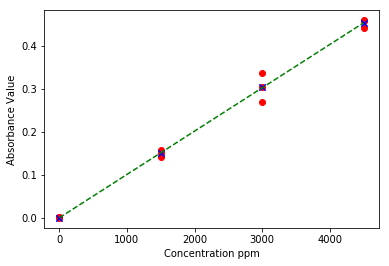

absorbance = 0.000101(concentration) + 0.000267
concentration = (absorbance - 0.000267) / 0.000101
Nitrate Calibration Curve


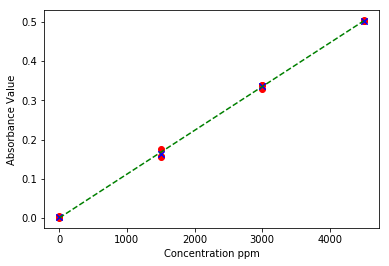

absorbance = 0.000112(concentration) + 0.000300
concentration = (absorbance - 0.000300) / 0.000112
Nitrate Calibration Curve


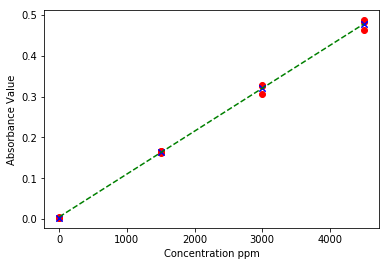

absorbance = 0.000105(concentration) + 0.005567
concentration = (absorbance - 0.005567) / 0.000105
Nitrate Calibration Curve


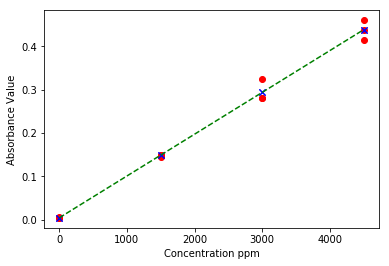

absorbance = 0.000096(concentration) + 0.004300
concentration = (absorbance - 0.004300) / 0.000096
Nitrate Calibration Curve


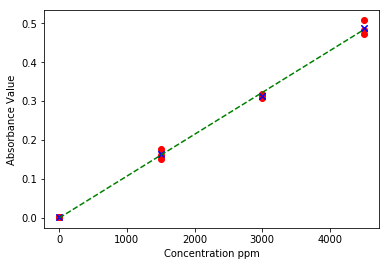

absorbance = 0.000107(concentration) + -0.000133
concentration = (absorbance - -0.000133) / 0.000107
Nitrate Calibration Curve


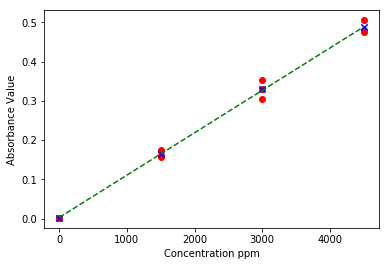

absorbance = 0.000108(concentration) + 0.003167
concentration = (absorbance - 0.003167) / 0.000108
Nitrate Calibration Curve


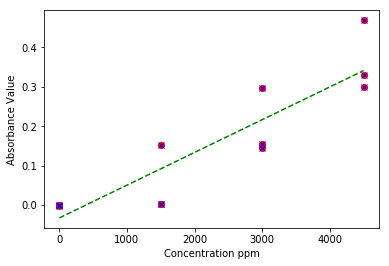

absorbance = 0.000083(concentration) + -0.032400
concentration = (absorbance - -0.032400) / 0.000083


ValueError: x and y must have same first dimension, but have shapes (12,) and (10,)

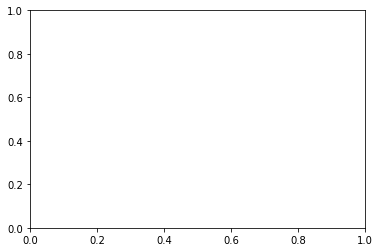

In [15]:
import glob
import pandas as pd
import numpy
import matplotlib.pylab as plt
import scipy
import pylab

print("Hello! Please provide your user name so the necessary files on this computer can be accessed.")
user_name = input()

data_file_n = '/Users/' + user_name + '/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Nitrates'

glob.os.chdir(data_file_n)

AllNfiles = glob.glob(data_file_n + "/*.csv")

list = []

for file in AllNfiles:
    nit_df = pd.read_csv(file, header=0)
    nit_df.rename(columns = {'Sample Name':'ID', '410 nm   [A]':'B'}, inplace=True)

    nit_g = nit_df.groupby('ID')

    nit_final=nit_df.merge(nit_g.mean(),on='ID')
    nit_final2=nit_final.merge(abs(nit_g.max()-nit_g.min())/nit_g.max(), on='ID')
    nit_final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

    c = (0,0,0,1500,1500,1500,3000,3000,3000,4500,4500,4500)
    a = nit_final2.iloc[4:16, 1]
    m = nit_final2.iloc[4:16, 2]

    pylab.plot(c, a, "ro")
    pylab.plot(c, m,'bx')
    pylab.ylabel("Absorbance Value")
    pylab.xlabel("Concentration ppm")

    z = numpy.polyfit(c, m, 1, rcond=None, full=False, w=None, cov=False)
    p = numpy.poly1d(z)
    pylab.plot(c, p(c),"g--")
    print("Nitrate Calibration Curve")
    pylab.show()
    print("absorbance = %.6f(concentration) + %.6f"%(z[0],z[1]))
    print("concentration = (absorbance - %.6f) / %.6f"%(z[1],z[0]))

    x=z[1]
    y=z[0]

    Concentration = []

    for key, row in nit_final2.iterrows():
        if float(row['Var']) > 0.1:
            Concentration.append('Error')
        else:
            Concentration.append(((float(row['Mean']) -x)/y).round(3))
        
    nit_final2["Concentration"] = Concentration
    nit_final2
    Nitrate_final = nit_final2.drop(nit_final2.columns[[1, 2, 3]], axis=1)



In [ ]:
import glob
import pandas as pd
import numpy
import matplotlib.pylab as plt
import scipy
import pylab

print("Hello! Please provide your user name so the necessary files on this computer can be accessed.")
user_name = input()

data_file_n = '/Users/' + user_name + '/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Nitrates'

glob.os.chdir(data_file_n)

AllNfiles = glob.glob(data_file_n + "/*.csv")

list = []

for file in AllNfiles:
    nit_df = pd.read_csv(file, header=0)
    nit_df.rename(columns = {'Sample Name':'ID', '410 nm   [A]':'B'}, inplace=True)

    nit_g = nit_df.groupby('ID')

    nit_final=nit_df.merge(nit_g.mean(),on='ID')
    nit_final2=nit_final.merge(abs(nit_g.max()-nit_g.min())/nit_g.max(), on='ID')
    nit_final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

    c = (0,0,0,1500,1500,1500,3000,3000,3000,4500,4500,4500)
    a = nit_final2.iloc[4:16, 1]
    m = nit_final2.iloc[4:16, 2]

    try:
        pylab.plot(c, a, "ro")
        pylab.plot(c, m,'bx')
        pylab.ylabel("Absorbance Value")
        pylab.xlabel("Concentration ppm")

        z = numpy.polyfit(c, m, 1, rcond=None, full=False, w=None, cov=False)
        p = numpy.poly1d(z)
        pylab.plot(c, p(c),"g--")
        print("Nitrate Calibration Curve")
        pylab.show()
        print("absorbance = %.6f(concentration) + %.6f"%(z[0],z[1]))
        print("concentration = (absorbance - %.6f) / %.6f"%(z[1],z[0]))

        x=z[1]
        y=z[0]

        Concentration = []

        for key, row in nit_final2.iterrows():
            if float(row['Var']) > 0.1:
                Concentration.append('Error')
            else:
                Concentration.append(((float(row['Mean']) -x)/y).round(3))
        
        nit_final2["Concentration"] = Concentration
        nit_final2
        Nitrate_final = nit_final2.drop(nit_final2.columns[[1, 2, 3]], axis=1)
    except: ValueError
    continue



Hello! Please provide your user name so the necessary files on this computer can be accessed.


Hello! Please provide your user name so the necessary files on this computer can be accessed.


 rveenstra


Ureide Calibration Curve


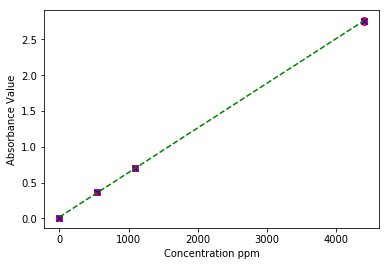

absorbance = 0.000623(concentration) + 0.019385
concentration = (absorbance - 0.019385) / 0.000623
Ureide Calibration Curve


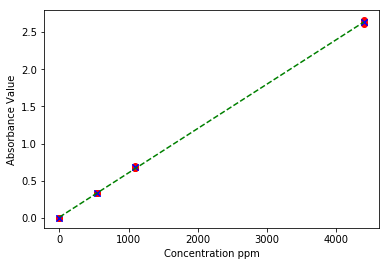

absorbance = 0.000596(concentration) + 0.012321
concentration = (absorbance - 0.012321) / 0.000596
Ureide Calibration Curve


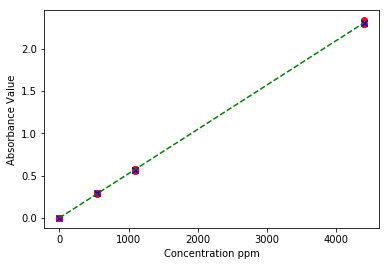

absorbance = 0.000523(concentration) + 0.002540
concentration = (absorbance - 0.002540) / 0.000523
Ureide Calibration Curve


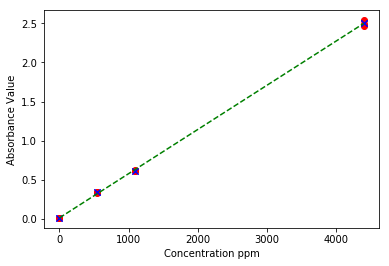

absorbance = 0.000566(concentration) + 0.010541
concentration = (absorbance - 0.010541) / 0.000566
Ureide Calibration Curve


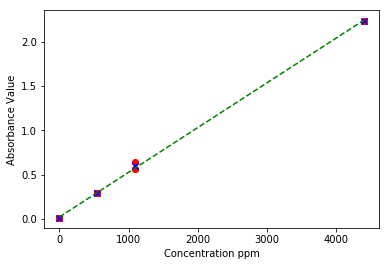

absorbance = 0.000505(concentration) + 0.020071
concentration = (absorbance - 0.020071) / 0.000505


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [13]:
import glob
import pandas as pd
import numpy
import matplotlib.pylab as plt
import scipy
import pylab

print("Hello! Please provide your user name so the necessary files on this computer can be accessed.")
user_name = input()

data_file_u = '/Users/' + user_name + '/Dropbox/CropProdLabKSU/Lab Analysis/VISIONlite Results/Ureides'

glob.os.chdir(data_file_u)

AllUfiles = glob.glob(data_file_u + "/*.csv")

list = []

for file in AllUfiles:
    ur_df = pd.read_csv(file, header=0)
    ur_df.rename(columns = {'Sample Name':'ID', '535 nm   [A]':'B'}, inplace=True)

    ur_g = ur_df.groupby('ID')

    ur_final=ur_df.merge(ur_g.mean(),on='ID')
    ur_final2=ur_final.merge(abs(ur_g.max()-ur_g.min())/ur_g.max(), on='ID')
    ur_final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

    c_u = (0,0,0,549.6,549.6,549.6,1099.2,1099.2,1099.2,4400,4400,4400)
    a_u = ur_final2.iloc[4:16, 1]
    m_u = ur_final2.iloc[4:16, 2]
    
    try:
        pylab.plot(c_u, a_u, "ro")
        pylab.plot(c_u, m_u,'bx')
        pylab.ylabel("Absorbance Value")
        pylab.xlabel("Concentration ppm")

        z_u = numpy.polyfit(c_u, m_u, 1, rcond=None, full=False, w=None, cov=False)
        p_u = numpy.poly1d(z_u)
        pylab.plot(c_u, p_u(c_u),"g--")
        print("Ureide Calibration Curve")
        pylab.show()
        print("absorbance = %.6f(concentration) + %.6f"%(z_u[0],z_u[1]))
        print("concentration = (absorbance - %.6f) / %.6f"%(z_u[1],z_u[0]))

        x_u=z_u[1]
        y_u=z_u[0]

        Concentration_u = []

        for key, row in ur_final2.iterrows():
            if float(row['Var']) > 0.1:
                Concentration_u.append('Error')
            else:
                Concentration_u.append(((float(row['Mean']) -x_u)/y_u).round(3))
        
        ur_final2["Concentration"] = Concentration_u
        ur_final2
        Ureide_final = ur_final2.drop(ur_final2.columns[[1, 2, 3]], axis=1)
    except TypeError:
        continue